In [1]:
# ===== Core Python & Data Libraries =====
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import operator
import warnings
warnings.filterwarnings("ignore")

# ===== TensorFlow / Keras =====
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D, Conv2D, Dense, BatchNormalization, Flatten,
    MaxPooling1D, Dropout, LSTM, SimpleRNN
)
from tensorflow.keras.utils import to_categorical

# ===== Scikit-learn =====
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import plot_tree
from sklearn import tree

# ===== Colab Upload Tools =====
from google.colab import files
import io

print("✅ All libraries imported successfully.")


✅ All libraries imported successfully.


In [2]:
# --- STEP 1: Upload cleaned climate dataset ---
print("📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
climate = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded cleaned climate dataset: {first_file}")

# Preview
print("\n🌦 Climate data preview:")
display(climate.head())


# --- STEP 2: Upload prediction dataset ---
print("\n📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'")
uploaded = files.upload()

# Load the first uploaded file
first_file = list(uploaded.keys())[0]
prediction = pd.read_csv(io.BytesIO(uploaded[first_file]))
print(f"✅ Loaded prediction dataset: {first_file}")

# Preview
print("\n🔎 Prediction data preview:")
display(prediction.head())


📤 Upload your cleaned climate dataset (e.g., climate_clean_data_new.csv)


Saving climate_clean_data_new.csv to climate_clean_data_new.csv
✅ Loaded cleaned climate dataset: climate_clean_data_new.csv

🌦 Climate data preview:


,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4



📤 Upload 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'


Saving Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv to Dataset-Answers-Weather_Prediction_Pleasant_Weather (1).csv
✅ Loaded prediction dataset: Dataset-Answers-Weather_Prediction_Pleasant_Weather (1).csv

🔎 Prediction data preview:


,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
climate.shape

(22950, 137)

In [4]:
prediction.shape

(22950, 16)

In [5]:
# Reduce observations dataset to 2010's

dfdecade = climate[(climate['DATE'].astype(str).str[:4] >= '2010') & (climate['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,...,0.2,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5
21911,20191228,12,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,...,-1.0,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5
21912,20191229,12,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,...,5.8,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5
21913,20191230,12,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,...,9.6,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5


In [6]:
# Reduce answers dataset to 2010's

answers_decade = prediction[(prediction['DATE'].astype(str).str[:4] >= '2010') & (prediction['DATE'].astype(str).str[:4] <= '2019')]
answers_decade

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [8]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [9]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [10]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]

    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
VALENTIA: 32868 entries
BELGRADE: 32868 entries
MADRID: 32868 entries
MUNCHENB: 32868 entries
BUDAPEST: 32868 entries
BASEL: 32868 entries
KASSEL: 32868 entries
LJUBLJANA: 32868 entries
MAASTRICHT: 32868 entries
HEATHROW: 32868 entries
SONNBLICK: 32868 entries
STOCKHOLM: 32868 entries
OSLO: 32868 entries
DUSSELDORF: 32868 entries
DEBILT: 32868 entries


In [11]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [12]:
dfdecade.shape # observations dataset has the correct shape

(3652, 135)

In [13]:
answers_decade.drop(columns = 'DATE', inplace = True)

In [14]:
answers_decade.shape # predictions dataset has the correct shape

(3652, 15)

In [15]:
X = dfdecade

In [16]:
y = answers_decade

In [17]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [18]:
X.shape

(3652, 135)

In [19]:
y.shape

(3652, 15)

In [20]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


In [22]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)

# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5892661555312158


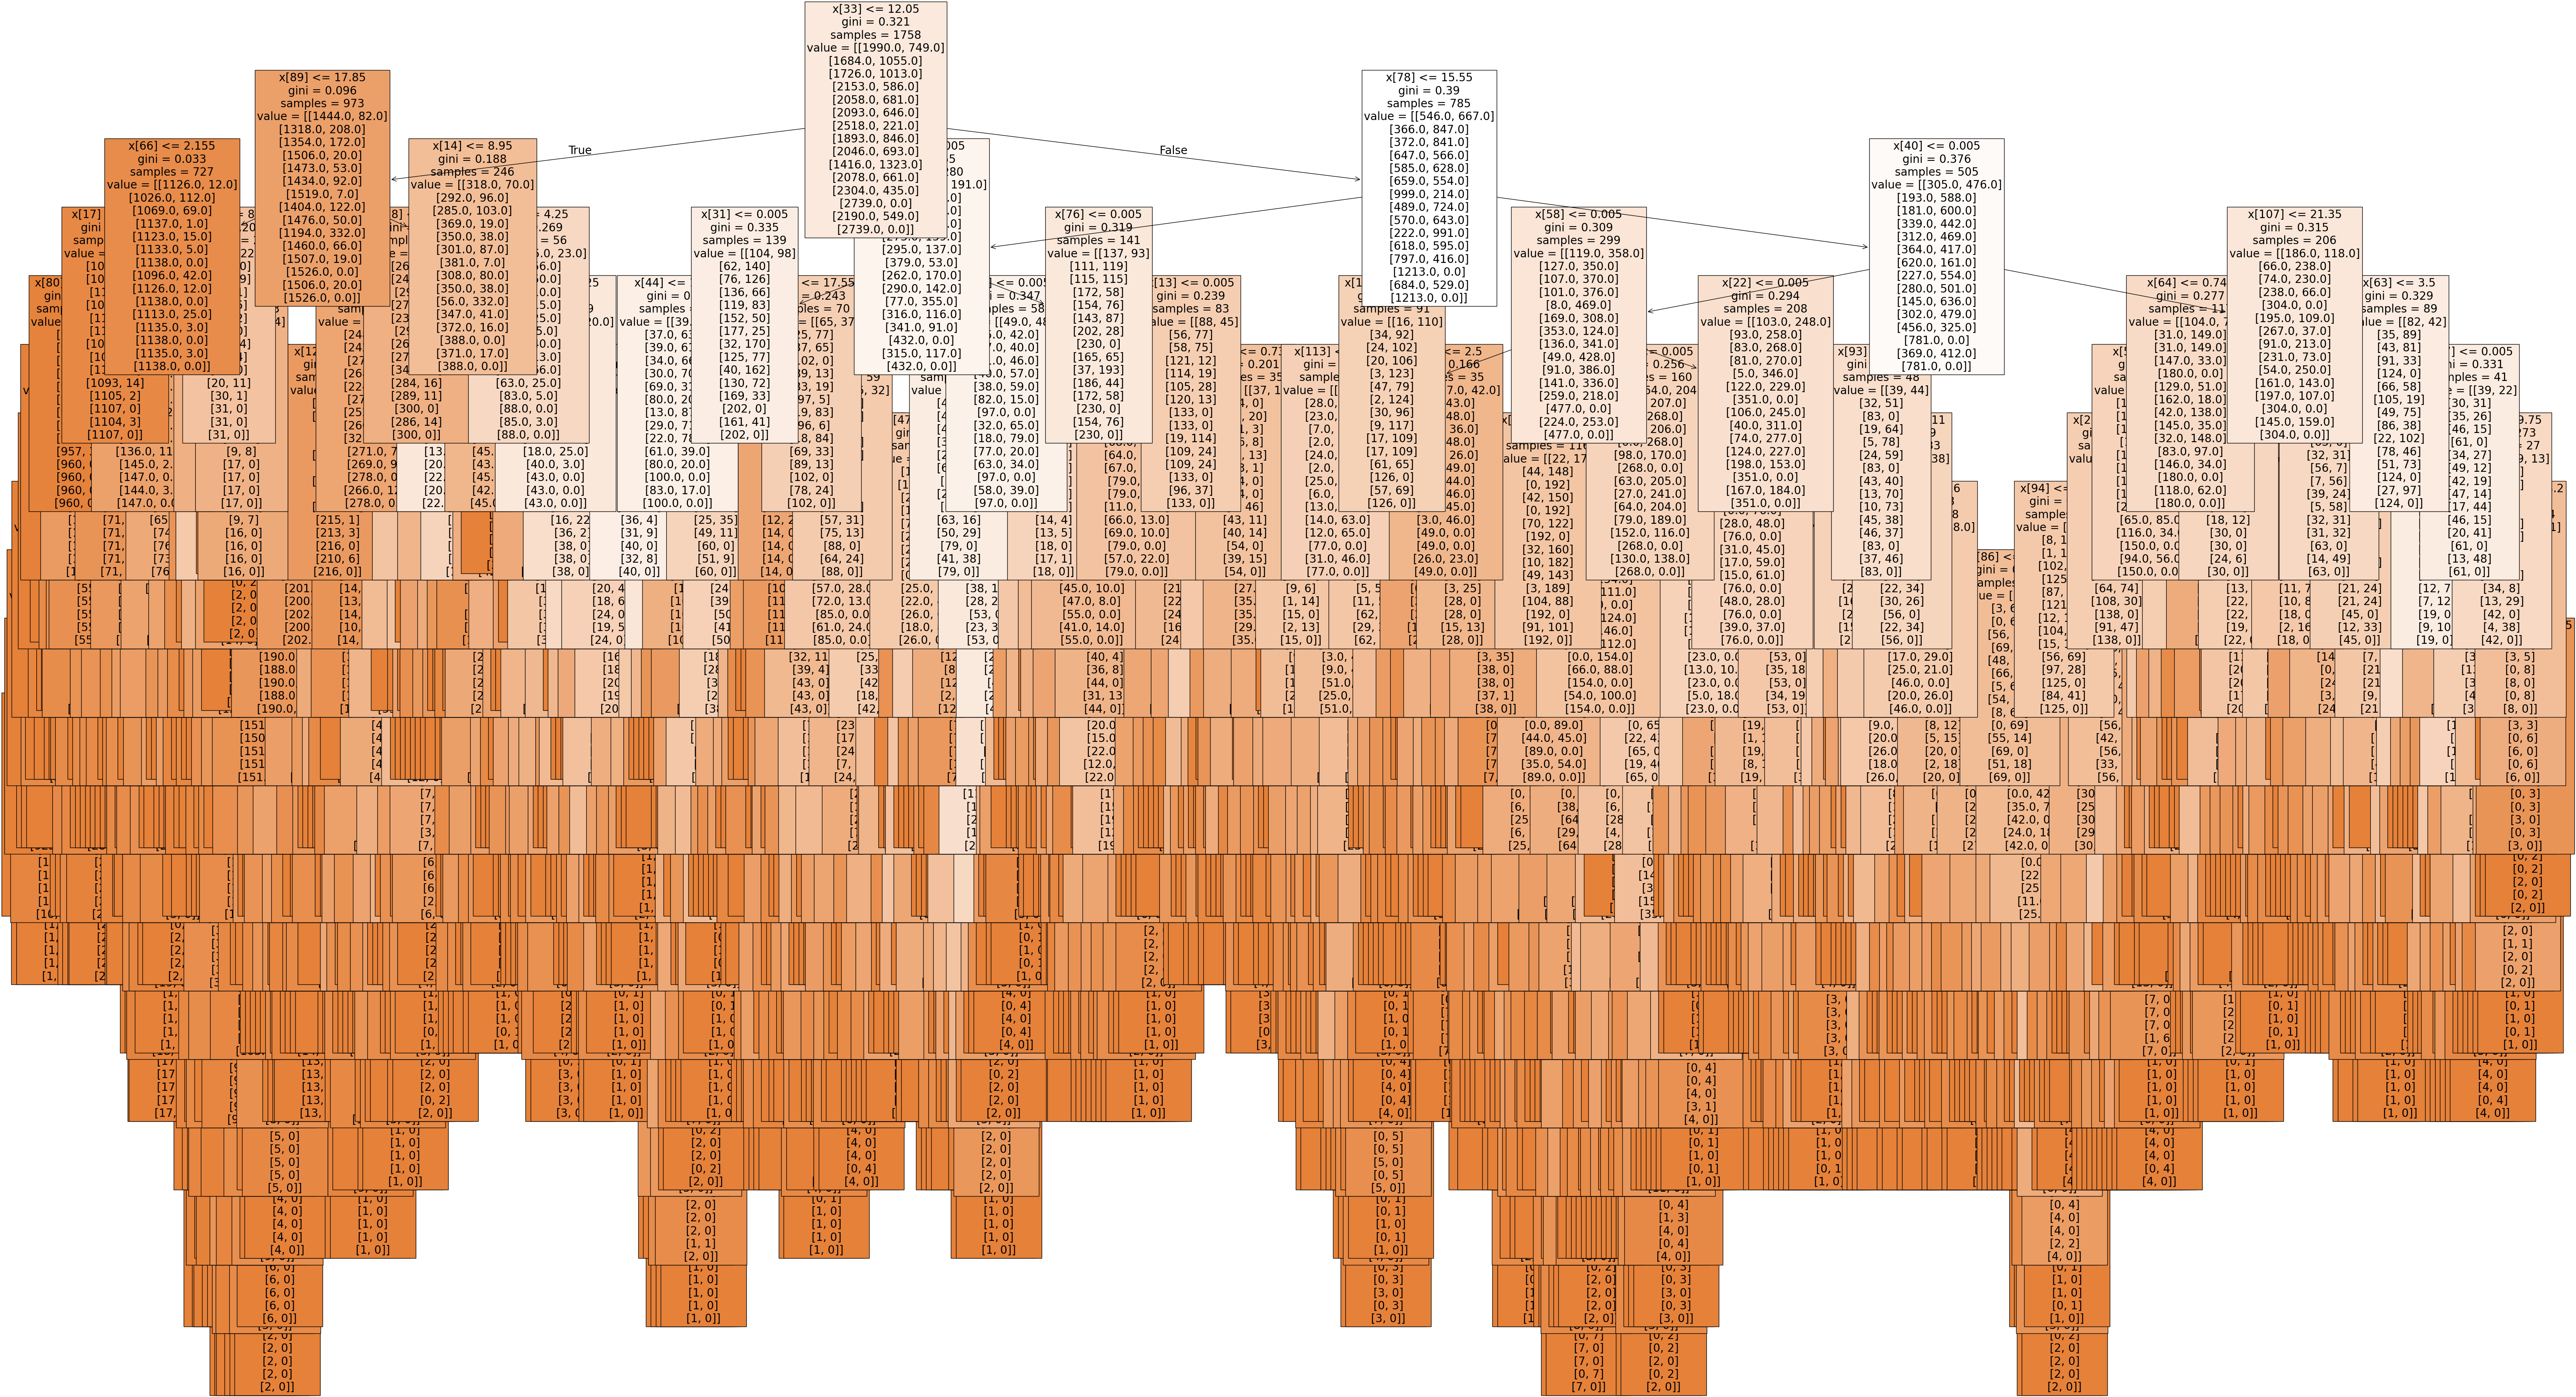

In [24]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [25]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([4.61629418e-03, 3.68900544e-03, 3.48032690e-03, 3.60433340e-03,
       1.90434140e-02, 8.95057846e-03, 1.52089269e-02, 5.61068706e-03,
       4.21821663e-02, 4.39413482e-03, 3.25698157e-03, 3.62649709e-03,
       2.87490368e-03, 1.63672998e-02, 2.98242782e-03, 7.99791434e-03,
       2.75518404e-03, 1.13243543e-02, 4.27678758e-04, 0.00000000e+00,
       0.00000000e+00, 1.36682316e-03, 1.55039598e-02, 1.33407868e-03,
       1.90182891e-02, 6.39884962e-03, 1.53880788e-02, 2.23469091e-03,
       3.03449690e-03, 3.93661248e-03, 5.82995263e-03, 1.84233903e-02,
       5.62350437e-03, 1.26956102e-02, 3.18370204e-03, 3.19578227e-02,
       2.86927031e-03, 3.17467416e-03, 5.08002296e-03, 4.15444387e-03,
       2.37156366e-02, 6.25926944e-03, 1.39909471e-02, 2.81525133e-03,
       2.93881089e-02, 2.62033841e-03, 3.69694777e-03, 3.64251097e-03,
       4.65076124e-03, 9.11497518e-03, 4.70578218e-03, 1.46667372e-02,
       3.26712175e-03, 1.16683495e-02, 3.00822390e-03, 2.34755363e-03,
      

In [26]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[4.61629418e-03, 3.68900544e-03, 3.48032690e-03, 3.60433340e-03,
         1.90434140e-02, 8.95057846e-03, 1.52089269e-02, 5.61068706e-03,
         4.21821663e-02],
        [4.39413482e-03, 3.25698157e-03, 3.62649709e-03, 2.87490368e-03,
         1.63672998e-02, 2.98242782e-03, 7.99791434e-03, 2.75518404e-03,
         1.13243543e-02],
        [4.27678758e-04, 0.00000000e+00, 0.00000000e+00, 1.36682316e-03,
         1.55039598e-02, 1.33407868e-03, 1.90182891e-02, 6.39884962e-03,
         1.53880788e-02],
        [2.23469091e-03, 3.03449690e-03, 3.93661248e-03, 5.82995263e-03,
         1.84233903e-02, 5.62350437e-03, 1.26956102e-02, 3.18370204e-03,
         3.19578227e-02],
        [2.86927031e-03, 3.17467416e-03, 5.08002296e-03, 4.15444387e-03,
         2.37156366e-02, 6.25926944e-03, 1.39909471e-02, 2.81525133e-03,
         2.93881089e-02],
        [2.62033841e-03, 3.69694777e-03, 3.64251097e-03, 4.65076124e-03,
         9.11497518e-03, 4.70578218e-03, 1.46667372e-02, 3.26712175

In [27]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.10638573, 0.0555797 , 0.05943776, 0.08691978, 0.09144762,
       0.05803352, 0.02974309, 0.09450722, 0.10736494, 0.06948047,
       0.08568518, 0.06139054, 0.03646303, 0.05369704, 0.00386436])

In [28]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [29]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

,0
MAASTRICHT,0.107365
VALENTIA,0.106386
LJUBLJANA,0.094507
BUDAPEST,0.091448
MUNCHENB,0.086920
SONNBLICK,0.085685
HEATHROW,0.069480
STOCKHOLM,0.061391
MADRID,0.059438
BASEL,0.058034


In [30]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['VALENTIA', 'BELGRADE', 'MADRID', 'MUNCHENB', 'BUDAPEST', 'BASEL', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'HEATHROW', 'SONNBLICK', 'STOCKHOLM', 'OSLO', 'DUSSELDORF', 'DEBILT']


Text(0.5, 1.0, 'Weather Station Importance 2010s')

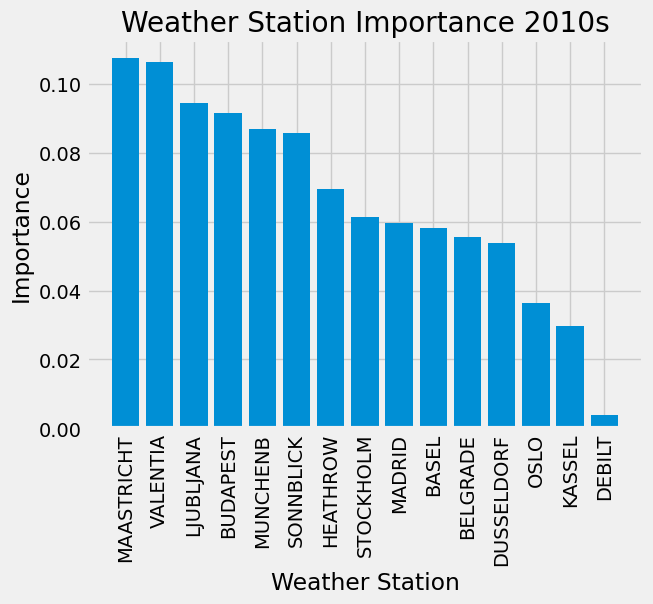

In [31]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s')